# Data Mining Assignment 3

### By: Jonathan Johannemann
The following is based off of the German Credit case.

In [54]:
import pandas as pd,matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from sklearn import *
%matplotlib inline
df = pd.read_csv("GermanCredit.csv",sep=',',header=0)
predictors,predicted = df.columns.values[1:-1],df.columns.values[-1]
train,cv = model_selection.train_test_split(df,test_size=0.4)
cv,test = model_selection.train_test_split(cv,test_size=0.5)
print "The predictor variables are:",predictors
print "\nTraining Set Length:",len(train)
print "Cross Validation Set Length:",len(cv)
print "Test Set Length:",len(test)

The predictor variables are: ['CHK_ACCT' 'DURATION' 'HISTORY' 'NEW_CAR' 'USED_CAR' 'FURNITURE'
 'RADIO/TV' 'EDUCATION' 'RETRAINING' 'AMOUNT' 'SAV_ACCT' 'EMPLOYMENT'
 'INSTALL_RATE' 'MALE_DIV' 'MALE_SINGLE' 'MALE_MAR_or_WID' 'CO-APPLICANT'
 'GUARANTOR' 'PRESENT_RESIDENT' 'REAL_ESTATE' 'PROP_UNKN_NONE' 'AGE'
 'OTHER_INSTALL' 'RENT' 'OWN_RES' 'NUM_CREDITS' 'JOB' 'NUM_DEPENDENTS'
 'TELEPHONE' 'FOREIGN']

Training Set Length: 600
Cross Validation Set Length: 200
Test Set Length: 200


Instead, for this assignment, students were told to split the data into training, cross validation and test data. Furthermore, we can also see some of the different predictors listed above.

In [55]:
df.describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [56]:
contin = ['AMOUNT','DURATION','AGE']
for c in contin:
    train[c] = preprocessing.scale(train[c])
    cv[c] = preprocessing.scale(cv[c])
    test[c] = preprocessing.scale(test[c])


Above, I took the three continuous variables that will be used in the model and scaled them using sklearn.preprocessing.scale. The way that this function goes about scaling is centering with respect to the mean and divided by unit variance.

In [57]:
for pair in sorted(zip(tree.DecisionTreeClassifier().fit(train[predictors],train[predicted]).feature_importances_,predictors),reverse=True): 
    print pair

(0.13468994025406139, 'CHK_ACCT')
(0.13297283513853969, 'AMOUNT')
(0.095695297584355257, 'AGE')
(0.079595703773167728, 'DURATION')
(0.077993426118986658, 'EMPLOYMENT')
(0.068567052820036056, 'SAV_ACCT')
(0.062118008075839636, 'HISTORY')
(0.037592963745094354, 'PRESENT_RESIDENT')
(0.03643725621996332, 'INSTALL_RATE')
(0.030348000170544509, 'JOB')
(0.029506530163748809, 'EDUCATION')
(0.028043985402128491, 'USED_CAR')
(0.02635488751608478, 'MALE_MAR_or_WID')
(0.024568605216975563, 'NUM_DEPENDENTS')
(0.021821767696936847, 'RETRAINING')
(0.020278208960621807, 'GUARANTOR')
(0.016728430088701954, 'OTHER_INSTALL')
(0.012854189406280052, 'PROP_UNKN_NONE')
(0.010736415352354771, 'RADIO/TV')
(0.0090314070359748914, 'RENT')
(0.0086146460315679532, 'NEW_CAR')
(0.0083314472063119836, 'FURNITURE')
(0.0070120607444805073, 'FOREIGN')
(0.0064832007948080889, 'TELEPHONE')
(0.005008614817486076, 'NUM_CREDITS')
(0.0040068918539888608, 'MALE_SINGLE')
(0.0025534114755811446, 'MALE_DIV')
(0.002054816335378900

Using the decision tree classifier, I tried to see what the feature importances were for each variable.

In [58]:
variables_selected = ['CHK_ACCT','AMOUNT','DURATION','AGE','PRESENT_RESIDENT',
                      'EMPLOYMENT','HISTORY','SAV_ACCT','JOB','OTHER_INSTALL',
                      'NUM_DEPENDENTS']

Based on the feature importances, I picked the above variables.

In [59]:
purpose = ['USED_CAR','NEW_CAR','RADIO/TV','EDUCATION','RETRAINING','FURNITURE']
for col in purpose:
    print col, ":", len(df[df[col]==1])
print "Entire dataframe length:",len(df)

USED_CAR : 103
NEW_CAR : 234
RADIO/TV : 280
EDUCATION : 50
RETRAINING : 97
FURNITURE : 181
Entire dataframe length: 1000


As we can see, these reasons for requesting credit are not consistent and so it will either make sense to combine these reasons into one column or neglect them entirely. For now, given that some of the reasons are represented far more than others (280 for RADIO/TV vs 50 for EDUCATION), I am going to leave this out.

In [60]:
from sklearn.grid_search import GridSearchCV
log_reg_params = {'penalty' : ('l1','l2')}
log_reg = GridSearchCV(linear_model.LogisticRegression(),log_reg_params)

decision_tree_params = {'criterion' : ['gini','entropy'],
                        'max_depth' : [3,4,5,6,8,None],
                        'min_samples_split' : [2,4,8,16,32,64],
                        'min_impurity_split' : [1e-7,1e-6,1e-5,1e-4]}
decision_tree = GridSearchCV(tree.DecisionTreeClassifier(),decision_tree_params)
neural_network_params = {'activation' : ['relu','logistic','tanh'],
                         'hidden_layer_sizes' : [(i) for i in range(1,30)]}
neural_net = GridSearchCV(neural_network.MLPClassifier(),neural_network_params)

lda_params = {'solver' : ['svd','lsqr','eigen']}
lda = GridSearchCV(discriminant_analysis.LinearDiscriminantAnalysis(),lda_params)

For the German Credit case, we were requested to use decision trees, neural networks, linear discriminant analysis, and logistic regression. Above, I used a grid search over parameters I was most familiar with in order to figure out what would be the best model.

In [61]:
log_reg.fit(train[variables_selected],train[predicted])
print "Logistic Regression"
print "Train accuracy: ",log_reg.score(train[variables_selected],train[predicted])
print "Cross Validation accuracy: ",log_reg.score(cv[variables_selected],cv[predicted]),"\n"

Logistic Regression
Train accuracy:  0.775
Cross Validation accuracy:  0.735 



In [62]:
print log_reg.best_params_
print log_reg.best_estimator_

{'penalty': 'l2'}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [63]:
lr_pred = log_reg.predict(test[variables_selected])
print metrics.confusion_matrix(cv[predicted],lr_pred)
print "Test accuracy: ",log_reg.score(test[variables_selected],test[predicted])

[[ 17  49]
 [ 24 110]]
Test accuracy:  0.73


In [64]:
decision_tree.fit(train[variables_selected],train[predicted])
print "Decision Tree"
print "Train accuracy: ",decision_tree.score(train[variables_selected],train[predicted])
print "Cross Validation accuracy: ",decision_tree.score(cv[variables_selected],cv[predicted]),"\n"

Decision Tree
Train accuracy:  0.791666666667
Cross Validation accuracy:  0.73 



In [65]:
print decision_tree.best_params_
print decision_tree.best_estimator_

{'min_samples_split': 64, 'min_impurity_split': 1e-07, 'criterion': 'gini', 'max_depth': 8}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=64, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [66]:
dt_pred = decision_tree.predict(test[variables_selected])
print metrics.confusion_matrix(cv[predicted],dt_pred)
print "Test accuracy: ",decision_tree.score(test[variables_selected],test[predicted])

[[ 10  56]
 [ 24 110]]
Test accuracy:  0.755


In [67]:
neural_net.fit(train[variables_selected],train[predicted])
print "Neural Network"
print "Train accuracy: ",neural_net.score(train[variables_selected],train[predicted])
print "Cross Validation accuracy: ",neural_net.score(cv[variables_selected],cv[predicted]),"\n"

Neural Network
Train accuracy:  0.801666666667
Cross Validation accuracy:  0.725 



In [68]:
print neural_net.best_params_
print neural_net.best_estimator_

{'activation': 'relu', 'hidden_layer_sizes': 17}
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [69]:
nn_pred = neural_net.predict(test[variables_selected])
print metrics.confusion_matrix(cv[predicted],nn_pred)
print "Test accuracy: ",neural_net.score(test[variables_selected],test[predicted])

[[ 16  50]
 [ 29 105]]
Test accuracy:  0.72


In [70]:
lda.fit(train[variables_selected],train[predicted])
print "Linear Discriminant Analysis"
print "Train accuracy: ",lda.score(train[variables_selected],train[predicted])
print "Cross Validation accuracy: ",lda.score(cv[variables_selected],cv[predicted]),"\n"

Linear Discriminant Analysis
Train accuracy:  0.775
Cross Validation accuracy:  0.735 



In [71]:
print lda.best_params_
print lda.best_estimator_

{'solver': 'svd'}
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


In [72]:
lda_pred = lda.predict(test[variables_selected])
print metrics.confusion_matrix(cv[predicted],lda_pred)
print "Test accuracy: ",lda.score(test[variables_selected],test[predicted])

[[ 18  48]
 [ 26 108]]
Test accuracy:  0.715


Above, we can see the performance of each model with train, cross validation, and test accuracies. Furthermore, the confusion matrices for the cross validation sets are provided. Finally, the configurations for the best model setups are shown.

Location of max profit is: 28
[[48 18]
 [41 93]]


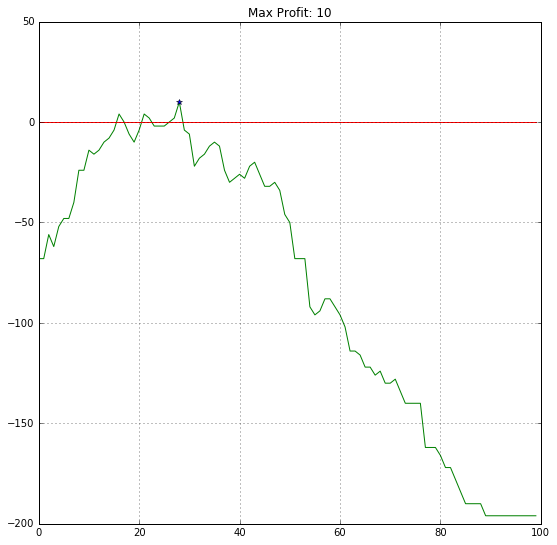

In [91]:
import numpy as np
profits = []
for j in range(100):
    pred = []
    for i in range(len(log_reg.predict_proba(cv[variables_selected]))):
        pred.append(int(log_reg.predict_proba(cv[variables_selected])[i][0]<float(j/100.0)))

    profits.append(sum(sum(metrics.confusion_matrix(cv[predicted],pred)*np.array([[1,-5],[-1,1]]))))
plt.figure(figsize=(9,9))
plt.plot(range(100),profits,'g',range(100),np.zeros(100),'r-')
plt.plot(profits.index(max(profits)),max(profits),'b*')
plt.title('Max Profit: %s' % max(profits))
plt.grid(True)
print "Location of max profit is: %s" % profits.index(max(profits))
pred = []
for i in range(len(log_reg.predict_proba(cv[variables_selected]))):
    pred.append(int(log_reg.predict_proba(cv[variables_selected])[i][0]<float(profits.index(max(profits))/100.0)))
print metrics.confusion_matrix(cv[predicted],pred)

For this next section, a profit matrix of [[1 -5], [-1 1]] was provided. Applying this profit matrix to get a decision matrix, we find that it is optimal to have a percentage cutoff of 100-28 = 72% percent probability for maximum profit. After this, all instances below this probability would be predicted as non-response or not creditworthy for logistic regression given that it had one of the best performances on the cross validation data (the data set we were supposed to reference for the decision matrix).

Location of max profit is: 26
[[ 41  25]
 [ 31 103]]


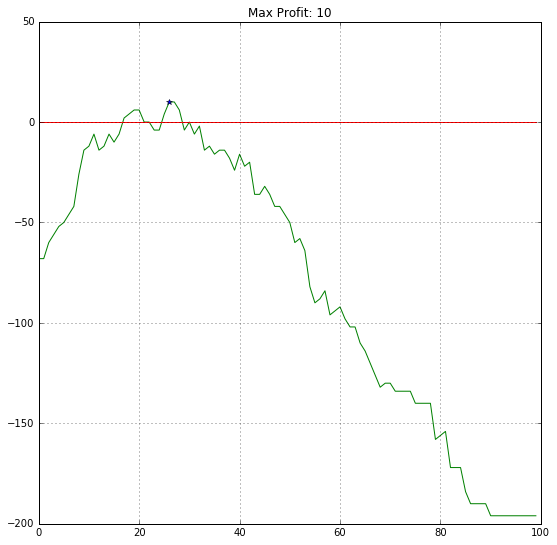

In [74]:
import numpy as np
profits = []
for j in range(100):
    lr_pred = []
    for i in range(len(lda.predict_proba(cv[variables_selected]))):
        lr_pred.append(int(lda.predict_proba(cv[variables_selected])[i][0]<float(j/100.0)))

    profits.append(sum(sum(metrics.confusion_matrix(cv[predicted],lr_pred)*np.array([[1,-5],[-1,1]]))))
plt.figure(figsize=(9,9))
plt.plot(range(100),profits,'g',range(100),np.zeros(100),'r-')
plt.plot(profits.index(max(profits)),max(profits),'b*')
plt.title('Max Profit: %s' % max(profits))
plt.grid(True)
print "Location of max profit is: %s" % profits.index(max(profits))
lr_pred = []
for i in range(len(lda.predict_proba(cv[variables_selected]))):
    lr_pred.append(int(lda.predict_proba(cv[variables_selected])[i][0]<float(34/100.0)))
print metrics.confusion_matrix(cv[predicted],lr_pred)

For this next section, a profit matrix of [[1 -5], [-1 1]] was provided. Applying this profit matrix to get a decision matrix, we find that it is optimal to have a percentage cutoff of 100-26 = 74% percent probability for maximum profit. After this, all instances below this probability would be predicted as non-response or not creditworthy for linear discriminant analysis given that it had one of the best performances on the cross validation data (the data set we were supposed to reference for the decision matrix).

Location of max profit is: 76
This is the 38.0 percentile
The max profit is: 17
Total data profit: -50
Max profit probability cutoff: 0.839888846699


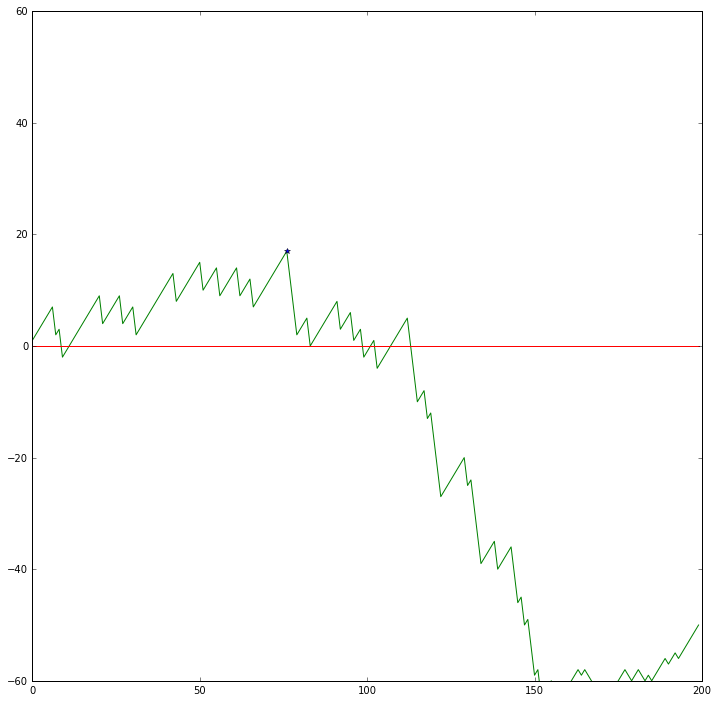

In [92]:
profit_check = []
val_zips = sorted(zip([y for (x,y) in log_reg.predict_proba(cv[variables_selected])],cv.RESPONSE),reverse=True)

profit = 0
for z in range(len(val_zips)):
    if (val_zips[z][0] >0.5) and (1 == val_zips[z][1]):
        profit+=1
    elif (val_zips[z][0] >0.5) and (val_zips[z][1] == 0):
        profit-=5
    elif (val_zips[z][0]<0.5) and (val_zips[z][1]== 0):
        profit+=1
    else:
        profit-=1
    profit_check.append(profit)
plt.figure(figsize=(12,12))
plt.plot(range(len(profit_check)),profit_check,'g-')
plt.plot(range(200),np.zeros(200),'r-')
plt.plot(profit_check.index(max(profit_check)),max(profit_check),'b*')
plt.ylim([-60,60])
print "Location of max profit is: %s" % profit_check.index(max(profit_check))
print "This is the %s percentile" % (100*profit_check.index(max(profit_check))/200.0)
print "The max profit is: %s" % max(profit_check)
print "Total data profit: %s" % profit_check[-1]
print "Max profit probability cutoff: %s" % sorted(zip([y for (x,y) in log_reg.predict_proba(cv[variables_selected])],cv.RESPONSE),reverse=True)[int(2*(100*profit_check.index(max(profit_check))/200.0))][0]

## 2. For the German credit data (ensembles):

### 2. a) i. Create a column of average predicted probabilities and use a cutoff of 0.5

In [77]:
from operator import add
temp1 = map(add,log_reg.predict_proba(test[variables_selected]),decision_tree.predict_proba(test[variables_selected]))
temp2 = map(add,neural_net.predict_proba(test[variables_selected]),lda.predict_proba(test[variables_selected]))
test['average_prob'] =  map(add,temp1,temp2)
test['average_prob'] = test.average_prob / 4.0
test['ensemble_prediction'] = test.average_prob.apply(lambda x: x.argmax())

### 2. a) ii. Create a confusion matrix for the classifications and note the overall rate

In [78]:
print metrics.confusion_matrix(test.RESPONSE,test.ensemble_prediction)

[[ 22  35]
 [ 17 126]]


### 2. b) Compare error rates on test data for the four individual and then the ensemble method

In [79]:
log_pred = log_reg.predict_proba(test[variables_selected])
print "For logistic regression the confusion matrix is: \n",metrics.confusion_matrix(test.RESPONSE,log_pred.argmax(axis=1))
dec_pred = decision_tree.predict_proba(test[variables_selected])
print "For the classification tree the confusion matrix is: \n",metrics.confusion_matrix(test.RESPONSE,dec_pred.argmax(axis=1))
neu_pred = neural_net.predict_proba(test[variables_selected])
print "For the neural network the confusion matrix is: \n",metrics.confusion_matrix(test.RESPONSE,neu_pred.argmax(axis=1))
lda_pred = lda.predict_proba(test[variables_selected])
print "For linear discriminant analysis the confusion matrix is: \n",metrics.confusion_matrix(test.RESPONSE,lda_pred.argmax(axis=1))

For logistic regression the confusion matrix is: 
[[ 22  35]
 [ 19 124]]
For the classification tree the confusion matrix is: 
[[ 21  36]
 [ 13 130]]
For the neural network the confusion matrix is: 
[[ 23  34]
 [ 22 121]]
For linear discriminant analysis the confusion matrix is: 
[[ 22  35]
 [ 22 121]]


## 3. For the German credit data (bagging and boosting):

In [80]:
from ggplot import *
default_rf = ensemble.RandomForestClassifier().fit(train[variables_selected],train[predicted])
rf_preds = default_rf.predict_proba(test[variables_selected])

default_adaboost = ensemble.GradientBoostingClassifier().fit(train[variables_selected],train[predicted])
boost_preds = default_adaboost.predict_proba(test[variables_selected])

default_decision = tree.DecisionTreeClassifier().fit(train[variables_selected],train[predicted])
decision_preds = default_decision.predict_proba(test[variables_selected])

### 3. a) Using a classification tree, determine overall test accuracy and lift at 0.10

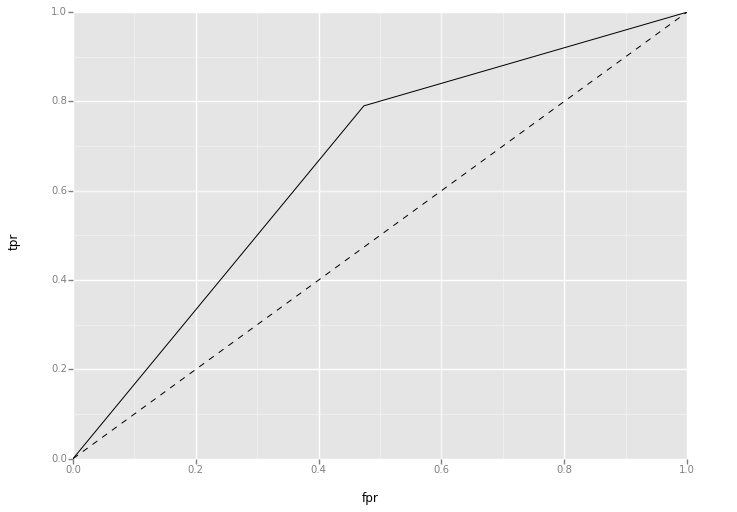

<ggplot: (19329102)>

In [81]:
fpr, tpr, _ = metrics.roc_curve(test[predicted].as_matrix(), decision_preds.argmax(axis=1))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [82]:
print df
print "Lift at 0.10 is: %s percent" % ((100*(df.tpr.ix[1]/df.fpr.ix[1] - 1.0)))

        fpr      tpr
0  0.000000  0.00000
1  0.473684  0.79021
2  1.000000  1.00000
Lift at 0.10 is: 66.8220668221 percent


In [83]:
default_decision.score(test[variables_selected],test[predicted])

0.71499999999999997

The lift at 0.10 is 66.8%. Also, the overall test accuracy is about 71.5 percent.

### 3. b) Using a Boosted Tree, determine overall test accuracy and lift at 0.10

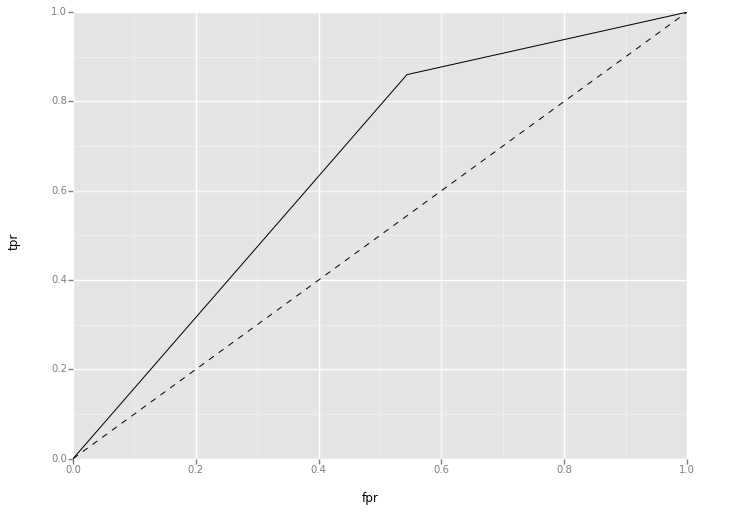

<ggplot: (22620115)>

In [84]:
fpr, tpr, _ = metrics.roc_curve(test[predicted].as_matrix(), boost_preds.argmax(axis=1))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [85]:
print df
print "Lift at 0.10 is: %s percent" % ((100*(df.tpr.ix[1]/df.fpr.ix[1] - 1.0)))

       fpr      tpr
0  0.00000  0.00000
1  0.54386  0.86014
2  1.00000  1.00000
Lift at 0.10 is: 58.1547484773 percent


In [86]:
default_adaboost.score(test[variables_selected],test[predicted])

0.745

The lift at 0.10 is 58.2% and the overall test accuracy is 74.5 percent.

### 3. c) Using Bootstrap Forest, determine overall test accuracy and lift at 0.10

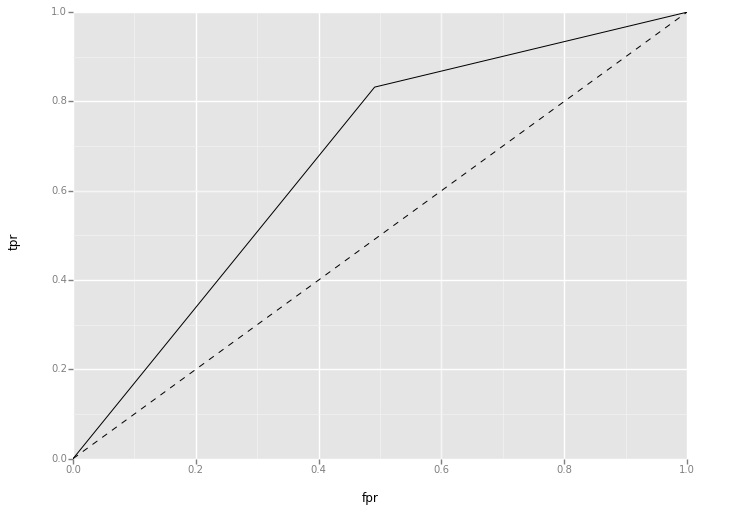

<ggplot: (22911601)>

In [87]:
fpr, tpr, _ = metrics.roc_curve(test[predicted].as_matrix(), rf_preds.argmax(axis=1))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [88]:
print df
print "Lift at 0.10 is: %s percent" % ((100*(df.tpr.ix[1]/df.fpr.ix[1] - 1.0)))

        fpr       tpr
0  0.000000  0.000000
1  0.491228  0.832168
2  1.000000  1.000000
Lift at 0.10 is: 69.4055944056 percent


In [89]:
default_rf.score(test[variables_selected],test[predicted])

0.73999999999999999

The lift at 0.10 is 69.4% and the overall test accuracy is about 74 percent.

### 3. d) Comparing the models: Which model has the best test accuracy? Compare the lift curves? Which model does the best job?

The boosted tree appears to have the best test accuracy of 74.5 percent. The boosted tree leads by a margin of about 0.5 percent over bootstrap forest and a normal classification tree. Furthermore, the lift curve for the boosted tree has the steepest initial lift slope with the classification tree in second and bootstrap forest in last place. Overall, the boosted tree is the model that does the best job based on our observations.